<a href="https://colab.research.google.com/github/cloudrumour/exercise_diary_jupyter/blob/main/Envision_Exercise_Diary_Pretty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
import os
from google.colab import files
from datetime import datetime

# Define the expected name of the file
file_name = 'Envision_Exercise_Diary.xlsx'

# Check if a file with the same name exists and remove it BEFORE uploading
if os.path.exists(file_name):
  # You might want to add a confirmation step here before removing
  os.remove(file_name)
  print(f"Removed existing file: {file_name}")
else:
  print(f"No existing file named {file_name} found. Proceeding with upload.")


# Upload the new file
print("Please choose the file to upload:")
uploaded = files.upload()

# Get the name of the first uploaded file to confirm (optional)
if uploaded:
  uploaded_file_name = list(uploaded.keys())[0]
  print(f"Uploaded file name: {uploaded_file_name}")

  # Now you can work with the uploaded file, which is already in the current directory
  # Since we removed the old one, the new one should have the original name
  # For example, to read it with pandas:
  # import pandas as pd
  # df = pd.read_excel(file_name, engine='openpyxl') # Use the expected file_name
  # display(df.head())

else:
  print("No file was uploaded.")

# Get current timestamp
current_time = datetime.now()

# Print it
print("Current timestamp:", current_time)


Removed existing file: Envision_Exercise_Diary.xlsx
Please choose the file to upload:


Saving Envision_Exercise_Diary.xlsx to Envision_Exercise_Diary.xlsx
Uploaded file name: Envision_Exercise_Diary.xlsx
Current timestamp: 2025-11-07 19:16:36.451559


In [ ]:
# @title
import os
import stat
import pwd
import grp
import time
from datetime import datetime

def format_mode(mode):
    """Convert file mode to string like 'drwxr-xr-x'."""
    is_dir = 'd' if stat.S_ISDIR(mode) else '-'
    perms = ''
    for who in ['USR', 'GRP', 'OTH']:
        for what in ['R', 'W', 'X']:
            perms += (mode & getattr(stat, f'S_I{what}{who}')) and what.lower() or '-'
    return is_dir + perms

def list_detailed(directory='.'):
    """List files with details similar to 'ls -l'."""
    for f in os.listdir(directory):
        path = os.path.join(directory, f)
        try:
            st = os.stat(path)
            mode = format_mode(st.st_mode)
            nlink = st.st_nlink
            owner = pwd.getpwuid(st.st_uid).pw_name
            group = grp.getgrgid(st.st_gid).gr_name
            size = st.st_size
            mtime = time.strftime('%Y-%m-%d %H:%M', time.localtime(st.st_mtime))
            print(f"{mode} {nlink:3} {owner:8} {group:8} {size:8} {mtime} {f}")
        except Exception as e:
            print(f"Error reading {f}: {e}")

# Example usage
list_detailed()

print()

# Get current timestamp
current_time = datetime.now()

# Print it
print("Current timestamp:", current_time)


drwxr-xr-x   4 root     root         4096 2025-11-05 14:33 .config
-rw-r--r--   1 root     root      1629151 2025-11-07 19:16 Envision_Exercise_Diary.xlsx
drwxr-xr-x   1 root     root         4096 2025-11-05 14:33 sample_data

Current timestamp: 2025-11-07 19:16:36.467732


In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings

# Suppress all FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Load your Excel file
df = pd.read_excel('Envision_Exercise_Diary.xlsx', engine='openpyxl')

def aggregate_data(df, time_comparisons=['all_time']):
    """Aggregates total time, distance, and calories based on the specified time comparisons and displays in a table."""
    # Ensure date column is datetime
    df['date'] = pd.to_datetime(df['Date'])

    summary_data = {'Metric': ['Total Distance (km)', 'Total Time (hours)', 'Total Calories (kcal)']}

    current_date = pd.to_datetime('now')

    for time_comparison in time_comparisons:
        filtered_df = pd.DataFrame() # Initialize filtered_df for each loop iteration
        if time_comparison == 'all_time':
            filtered_df = df
            time_period_label = 'All Time'
        elif time_comparison == 'current_year':
            filtered_df = df[df['date'].dt.year == current_date.year]
            time_period_label = f'{current_date.year}'
        elif time_comparison == 'current_month':
            filtered_df = df[(df['date'].dt.year == current_date.year) & (df['date'].dt.month == current_date.month)].copy()
            time_period_label = f'{current_date.strftime("%B %Y")}'
        elif time_comparison == 'last_7_days':
            seven_days_ago = current_date - timedelta(days=7)
            filtered_df = df[df['date'] >= seven_days_ago].copy()
            time_period_label = 'Last 7 Days'
        # Add more elif conditions here for other time comparisons (e.g., 'last_30_days', 'current_week', etc.)
        else:
            print(f"Invalid time_comparison: {time_comparison}. Skipping.")
            continue

        # Calculate totals for the filtered period
        total_distance = filtered_df['Distance - km'].sum()
        total_time = filtered_df['Duration - hours'].sum()
        total_calories = filtered_df['Calories'].sum()

        summary_data[time_period_label] = [f"{total_distance:.2f}", f"{total_time:.2f}", f"{total_calories:.2f}"]

    # Create a DataFrame for the table
    summary_df = pd.DataFrame(summary_data)

    display(summary_df)

def plot_flexible_pie_charts_by_time(df, metrics, time_comparisons):
    """Generates pie charts for specified metrics and time comparisons, split by Exercise Type,
    grouping charts by time period on the same row."""
    # Ensure date column is datetime
    df['date'] = pd.to_datetime(df['Date'])

    current_date = pd.to_datetime('now')

    for time_comparison in time_comparisons:
        print(f"\n--- Charts for {time_comparison.replace('_', ' ').title()} ---")
        num_charts = len(metrics)
        fig, axes = plt.subplots(1, num_charts, figsize=(6 * num_charts, 6)) # Adjust figsize based on number of charts

        if num_charts == 1:
            axes = [axes] # Make axes an array even for a single subplot

        # Determine filtered dataframe and time period label for the current time comparison
        filtered_df = pd.DataFrame() # Initialize filtered_df for each loop iteration
        if time_comparison == 'all_time':
            filtered_df = df
            time_period_label = 'All Time'
        elif time_comparison == 'current_year':
            filtered_df = df[df['date'].dt.year == current_date.year]
            time_period_label = f'{current_date.year}'
        elif time_comparison == 'current_month':
            filtered_df = df[(df['date'].dt.year == current_date.year) & (df['date'].dt.month == current_date.month)].copy()
            time_period_label = f'{current_date.strftime("%B %Y")}'
        elif time_comparison == 'last_7_days':
            seven_days_ago = current_date - timedelta(days=7)
            filtered_df = df[df['date'] >= seven_days_ago]
            time_period_label = 'Last 7 Days'
        # Add more elif conditions here for other time comparisons
        else:
            print(f"Invalid time_comparison: {time_comparison}. Skipping.")
            continue

        for i, metric in enumerate(metrics):
            # Calculate sum of metric by exercise type for the filtered period
            metric_by_exercise_type = filtered_df.groupby('Exercise Type')[metric].sum().sort_values(ascending=True)

            # Create pie chart in the subplot
            axes[i].pie(metric_by_exercise_type, labels=metric_by_exercise_type.index, autopct='%1.1f%%', startangle=140)
            axes[i].set_title(f'{metric} ({time_period_label})')
            axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        plt.tight_layout()
        plt.show() # Show the figure after all subplots for the current time period are created

def plot_flexible_stacked_bar_charts(df, metrics, time_comparisons):
    """Generates stacked bar charts for specified metrics and time comparisons, grouped by Exercise Type,
    grouping charts by time period on the same row."""
    # Ensure date column is datetime
    df['date'] = pd.to_datetime(df['Date'])

    current_date = pd.to_datetime('now')

    for time_comparison in time_comparisons:
        print(f"\n--- Charts for {time_comparison.replace('_', ' ').title()} ---")
        num_charts = len(metrics)
        # Adjust figsize based on number of charts and time comparison
        if time_comparison == 'current_month' or time_comparison == 'last_7_days':
             fig, axes = plt.subplots(1, num_charts, figsize=(15, 4)) # Adjusted width for current_month (approx 75% of 20)
        else:
             fig, axes = plt.subplots(1, num_charts, figsize=(12, 8)) # Default figsize


        if num_charts == 1:
            axes = [axes] # Make axes an array even for a single subplot

        # Determine filtered dataframe and time period label for the current time comparison
        filtered_df = pd.DataFrame() # Initialize filtered_df for each loop iteration
        if time_comparison == 'all_time':
             filtered_df = df
             time_period_label = 'All Time'
             xlabel = 'Year' # Assuming grouping by year for all_time bar chart
             filtered_df['Period'] = filtered_df['date'].dt.year
             grouped = filtered_df.groupby(['Period', 'Exercise Type'])[metrics].sum().unstack(fill_value=0)
        elif time_comparison == 'current_year':
            filtered_df = df[df['date'].dt.year == current_date.year].copy()
            time_period_label = f'{current_date.year}'
            xlabel = 'Month' # Assuming grouping by month for current_year bar chart
            filtered_df['Period'] = filtered_df['date'].dt.to_period('M')
            grouped_period = filtered_df.groupby(['Period', 'Exercise Type'])
            grouped = grouped_period[metrics].sum().unstack(fill_value=0)
        elif time_comparison == 'current_month':
            # Generate a full date range for the current month
            start_of_month = current_date.replace(day=1)
            end_of_month = (start_of_month + pd.DateOffset(months=1)) - timedelta(days=1)
            full_month_dates = pd.date_range(start=start_of_month, end=end_of_month, freq='D')

            # Filter the data for the current month
            filtered_df = df[(df['date'].dt.year == current_date.year) & (df['date'].dt.month == current_date.month)].copy()
            time_period_label = f'{current_date.strftime("%B %Y")}'
            xlabel = 'Day' # Grouping by day for current_month bar chart
            filtered_df['Period'] = filtered_df['date'].dt.day

            # Group and sum the data for the current month
            grouped_data = filtered_df.groupby(['Period', 'Exercise Type'])[metrics].sum().unstack(fill_value=0)

            # Flatten the columns of grouped_data before merging
            grouped_data.columns = [f'{col[0]}_{col[1]}' if isinstance(col, tuple) else col for col in grouped_data.columns]

            # Create a DataFrame with all days of the month and merge with the grouped data
            all_days_df = pd.DataFrame({'Period': full_month_dates.day})

            # Merge and fill NaNs
            merged_df = pd.merge(all_days_df, grouped_data.reset_index(), on='Period', how='left').fillna(0)

            # Set Period as index and sort
            merged_df = merged_df.set_index('Period').sort_index()

            # The columns are already flattened during the merge preparation
            grouped = merged_df


        elif time_comparison == 'last_7_days':
            seven_days_ago = current_date - timedelta(days=7)
            filtered_df = df[df['date'] >= seven_days_ago].copy()
            time_period_label = 'Last 7 Days'
            xlabel = 'Date' # Assuming grouping by date for last_7_days bar chart
            filtered_df['Period'] = filtered_df['date'].dt.date
            grouped_period = filtered_df.groupby(['Period', 'Exercise Type'])
            grouped = grouped_period[metrics].sum().unstack(fill_value=0)
        elif time_comparison == 'current_week':
            start_of_week = current_date - timedelta(days=current_date.weekday())
            end_of_week = start_of_week + timedelta(days=6)
            filtered_df = df[(df['date'] >= start_of_week) & (df['date'] <= end_of_week)].copy()
            time_period_label = 'Current Week'
            xlabel = 'Weekday' # Assuming grouping by weekday for current_week bar chart
            filtered_df['Period'] = filtered_df['date'].dt.day_name()
            # Order by weekday
            weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            filtered_df['Period'] = pd.Categorical(filtered_df['Period'], categories=weekday_order, ordered=True)
            grouped_period = filtered_df.groupby(['Period', 'Exercise Type'])
            grouped = grouped_period[metrics].sum().unstack(fill_value=0)
        elif time_comparison == 'rolling_13_months':
            thirteen_months_ago = current_date - pd.DateOffset(months=13)
            filtered_df = df[df['date'] >= thirteen_months_ago].copy()
            time_period_label = 'Last 12 Months'
            xlabel = 'Month' # Assuming grouping by month for rolling_13_months bar chart
            filtered_df['Period'] = filtered_df['date'].dt.to_period('M')
            grouped_period = filtered_df.groupby(['Period', 'Exercise Type'])
            grouped = grouped_period[metrics].sum().unstack(fill_value=0)
        else:
            print(f"Invalid time_comparison: {time_comparison}. Skipping.")
            continue

        for i, metric in enumerate(metrics):
            # Select columns for the current metric
            cols_to_plot = [col for col in grouped.columns if metric in col] # Select columns containing the metric name

            ax = grouped[cols_to_plot].plot(kind='bar', stacked=True, ax=axes[i], legend=False) # Use the specific subplot axis and filter columns

            axes[i].set_ylabel('Total ' + metric)
            axes[i].set_title(f'{metric} ({time_period_label})')
            axes[i].set_xlabel(xlabel)
            # Corrected tick rotation and alignment
            plt.setp(axes[i].get_xticklabels(), ha="right", rotation=45)
            #axes[i].legend(title='Exercise Type', bbox_to_anchor=(1.05, 1), loc='upper left')

            # Add value labels on each segment
            for container in ax.containers:
                 ax.bar_label(container, label_type='center', fontsize=7)

            # Add grand total on top of each bar
            totals = grouped[cols_to_plot].sum(axis=1) # Sum only the relevant metric columns
            for j, total in enumerate(totals):
                 axes[i].text(j, total + 1, f'{total:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

        # Add a single legend for all subplots in the figure
        handles, labels = axes[0].get_legend_handles_labels()
        # Adjust legend labels to only show exercise type - This needs adjustment for flattened columns
        if time_comparison == 'current_month':
             legend_labels = [col.split('_')[-1] for col in grouped.columns if any(m in col for m in metrics)]
        else:
             legend_labels = [col[1] for col in grouped.columns if any(m in col for m in metrics)]

        fig.legend(handles, legend_labels, title='Exercise Type', bbox_to_anchor=(1.05, 1), loc='upper left')


        plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend
        plt.show() # Show the figure after all subplots for the current time period are created

def plot_duration_by_exercise_type_stacked_by_year(df):
    """Plots Duration - hours against exercise type in bars stacked by year."""
    # Ensure date column is datetime
    df['date'] = pd.to_datetime(df['Date'])

    # Extract year
    df['Year'] = df['date'].dt.year

    # Group by year and exercise type and sum 'Duration - hours'
    grouped_data = df.groupby(['Exercise Type', 'Year'])['Duration - hours'].sum().unstack(fill_value=0)

    # Plot stacked bar chart
    ax = grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))

    # Add labels and title
    plt.ylabel('Total Duration (minutes)')
    plt.title('Total Duration by Exercise Type Stacked by Year')
    plt.xlabel('Year')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add value labels on each segment
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fontsize=7)

    # Add grand total on top of each bar
    totals = grouped_data.sum(axis=1)
    for i, total in enumerate(totals):
        ax.text(i, total + 1, f'{total:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend
    plt.show()

def plot_exercise_metrics_over_time(df, time_period='all_time', metrics=['kph']):
    """Plots specified metrics over time for a selected exercise type and time period."""
    # Ensure date and Year columns exist and are in the correct format
    df['date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['date'].dt.year

    # Calculate Calories per km and Calories per hour, handling potential division by zero
    df['Calories per km'] = df.apply(lambda row: row['Calories'] / row['Distance - km'] if row['Distance - km'] != 0 else 0, axis=1)
    df['Calories per hour'] = df.apply(lambda row: (row['Calories'] / row['Duration - hours']) * 60 if row['Duration - hours'] != 0 else 0, axis=1)


    # Validate the requested metrics
    supported_metrics = ['kph', 'Duration - hours', 'Calories', 'Calories per km', 'Calories per hour']
    for metric in metrics:
        if metric not in supported_metrics:
            print(f"Invalid metric: {metric}. Supported metrics are: {supported_metrics}")
            return

    # Get unique exercise types for the dropdown, including "ALL"
    exercise_types = ['ALL'] + df['Exercise Type'].unique().tolist()

    # Create exercise type dropdown widget
    exercise_type_dropdown = widgets.Dropdown(
        options=exercise_types,
        description='Exercise Type:',
        disabled=False,
    )

    # Function to update the plot based on dropdown selection
    def update_plot(exercise_type):
        if exercise_type == 'ALL':
            filtered_df = df.copy()
        else:
            filtered_df = df[df['Exercise Type'] == exercise_type].copy()

        current_date = pd.to_datetime('now')

        plot_df = pd.DataFrame() # Initialize plot_df for each case
        groupby_period = ''
        xlabel = ''
        time_period_label = ''

        if time_period == 'all_time':
            plot_df = filtered_df.copy()
            plot_df['Period'] = plot_df['date'].dt.year
            groupby_period = 'Year'
            xlabel = 'Year'
            time_period_label = 'All Time'
        elif time_period == 'rolling_5_years':
            five_years_ago = current_date - pd.DateOffset(years=5)
            plot_df = filtered_df[filtered_df['date'] >= five_years_ago].copy()
            plot_df['Period'] = plot_df['date'].dt.to_period('M').astype(str) # Convert to string for plotting
            groupby_period = 'Period'
            xlabel = 'Month'
            time_period_label = 'Rolling 5 Years'
        elif time_period == 'rolling_2_years':
            two_years_ago = current_date - pd.DateOffset(years=2)
            plot_df = filtered_df[filtered_df['date'] >= two_years_ago].copy()
            plot_df['Period'] = plot_df['date'].dt.to_period('M').astype(str) # Convert to string for plotting
            groupby_period = 'Period'
            xlabel = 'Month'
            time_period_label = 'Rolling 2 Years'
        else:
            print(f"Invalid time_period: {time_period}. Supported time periods are: all_time, rolling_5_years, rolling_2_years")
            return

        # Create a figure with a subplot for each metric
        num_metrics = len(metrics)
        fig, axes = plt.subplots(1, num_metrics, figsize=(12, 4)) # Adjust figsize as needed

        # Ensure axes is an array even for a single subplot
        if num_metrics == 1:
            axes = [axes]

        for i, metric in enumerate(metrics):
            # Group by period and calculate max, min, and average for the current metric
            metric_summary = plot_df.groupby(groupby_period)[metric].agg(['max', 'min', 'mean']).reset_index()

            # Convert Period to string for plotting if it's Period objects
            if groupby_period == 'Period':
                metric_summary[groupby_period] = metric_summary[groupby_period].astype(str)

            # Plotting
            axes[i].plot(metric_summary[groupby_period], metric_summary['max'], label=f'Max {metric}')
            axes[i].plot(metric_summary[groupby_period], metric_summary['min'], label=f'Min {metric}')
            axes[i].plot(metric_summary[groupby_period], metric_summary['mean'], label=f'Average {metric}')

            axes[i].set_xlabel(xlabel)
            axes[i].set_ylabel(metric)
            axes[i].set_title(f'{metric} Over Time ({exercise_type} - {time_period_label})')
            axes[i].legend()
            axes[i].grid(True)
            # Set x-axis ticks for years if groupby_period is Year
            if groupby_period == 'Year':
                 axes[i].set_xticks(metric_summary[groupby_period].astype(int))
            plt.setp(axes[i].get_xticklabels(), ha="right", rotation=45) # Rotate x-axis labels

            # Annotate points
            for j, row in metric_summary.iterrows():
                axes[i].annotate(f"{row['max']:.1f}", (row[groupby_period], row['max']), textcoords="offset points", xytext=(0,10), ha='center')
                axes[i].annotate(f"{row['min']:.1f}", (row[groupby_period], row['min']), textcoords="offset points", xytext=(0,-15), ha='center')
                axes[i].annotate(f"{row['mean']:.1f}", (row[groupby_period], row['mean']), textcoords="offset points", xytext=(0,5), ha='center')

        plt.tight_layout()
        plt.show()

    # Link the exercise type dropdown to the update function and display the interactive widget
    display(widgets.interactive(update_plot, exercise_type=exercise_type_dropdown))

def create_interactive_table(df):
    # Definition for the interactive table function
    from ipywidgets import VBox, HBox, IntText
    import datetime

    """Creates an interactive table with dropdown, text inputs for top/bottom N, sorting, and numbering."""

    # Exclude 'Weight Training' from the exercise type options
    exercise_types = ['ALL'] + [et for et in df['Exercise Type'].unique().tolist() if et != 'Weights']
    exercise_type_dropdown = widgets.Dropdown(options=exercise_types, description='Exercise Type:')

    distance_threshold_input = widgets.FloatText(description='Min Distance (km):', value=df['Distance - km'].min())

    # Add new input widgets for top/bottom N
    top_n_input = IntText(description='Top N:', value=10)
    bottom_n_input = IntText(description='Bottom N:', value=10)

    output = widgets.Output()

    def update_table(change):
        with output:
            clear_output(wait=True)
            # Use .copy() to ensure we're working on a copy and avoid SettingWithCopyWarning
            filtered_df = df.copy()

            # Ensure date column is datetime and calculate derived metrics within the function
            filtered_df.loc[:, 'date'] = pd.to_datetime(filtered_df['Date'])
            filtered_df.loc[:, 'Year'] = filtered_df['date'].dt.year

            # Calculate derived metrics, handling potential division by zero
            filtered_df.loc[:, 'Calories per km'] = filtered_df.apply(lambda row: row['Calories'] / row['Distance - km'] if row['Distance - km'] != 0 else 0, axis=1)
            filtered_df.loc[:, 'Calories per hour'] = filtered_df.apply(lambda row: (row['Calories'] / row['Duration - hours']) if row['Duration - hours'] != 0 else 0, axis=1)
            filtered_df.loc[:, 'kph'] = filtered_df.apply(lambda row: (row['Distance - km'] / row['Duration - hours']) if row['Duration - hours'] != 0 else 0, axis=1)
            filtered_df.loc[:, 'Mins per km'] = filtered_df.apply(lambda row: row['Duration - hours'] / row['Distance - km'] if row['Distance - km'] != 0 else 0, axis=1)

            # Filter by exercise type
            selected_exercise_type = exercise_type_dropdown.value
            if selected_exercise_type != 'ALL':
                # Use .copy() after filtering to avoid SettingWithCopyWarning
                filtered_df = filtered_df[filtered_df['Exercise Type'] == selected_exercise_type].copy()

            # Apply distance filter (now applied to all selectable types)
            min_distance = distance_threshold_input.value
            filtered_df = filtered_df[filtered_df['Distance - km'] >= min_distance].copy()

            # Sort by kph for default sort
            filtered_df = filtered_df.sort_values(by='kph', ascending=False)

            # Add original row numbers based on the current sort order of the filtered data
            filtered_df.loc[:, 'Original Row'] = range(1, len(filtered_df) + 1)

            # Get current day's entries indices
            current_date_only = datetime.datetime.now().date()
            current_day_indices = filtered_df[filtered_df['date'].dt.date == current_date_only].index.tolist()

            # Exclude current day indices from top/bottom N consideration
            non_current_day_df = filtered_df[filtered_df['date'].dt.date != current_date_only].copy()

            top_n = top_n_input.value
            bottom_n = bottom_n_input.value

            # Get indices for top N from non-current day data
            top_n_indices = []
            if top_n > 0:
                top_n_indices = non_current_day_df.head(top_n).index.tolist()

            # Get indices for bottom N from non-current day data
            bottom_n_indices = []
            if bottom_n > 0:
                 # Sort by kph ascending to get bottom N indices from non_current_day_df
                 bottom_n_df = non_current_day_df.sort_values(by='kph', ascending=True).head(bottom_n).copy()
                 bottom_n_indices = bottom_n_df.index.tolist()
                 # Sort the bottom N indices back to descending order based on their position in the filtered_df
                 bottom_n_indices.sort(key=lambda x: filtered_df.index.get_loc(x)) # Sort by their position in the original filtered_df
                 bottom_n_indices.reverse() # Reverse to get descending order

            # Combine all unique indices to be displayed, maintaining order based on filtered_df
            all_displayed_original_indices = sorted(list(set(top_n_indices + current_day_indices + bottom_n_indices)), key=lambda x: filtered_df.index.get_loc(x))

            # Build the final display dataframe row by row, inserting ellipsis
            final_display_list = []
            last_iloc_in_filtered_df = -1 # Use -1 to indicate the start before any rows in filtered_df

            for original_index in all_displayed_original_indices:
                 current_iloc_in_filtered_df = filtered_df.index.get_loc(original_index)

                 # Check for gap before the current row based on position in filtered_df
                 if last_iloc_in_filtered_df != -1 and current_iloc_in_filtered_df > last_iloc_in_filtered_df + 1:
                      ellipsis_row = pd.DataFrame([{col: '...' for col in filtered_df.columns}])
                      final_display_list.append(ellipsis_row)

                 # Add the current row from filtered_df
                 final_display_list.append(filtered_df.loc[[original_index]].copy()) # Use .copy()
                 last_iloc_in_filtered_df = current_iloc_in_filtered_df # Update last_iloc_in_filtered_df to the current index's position in filtered_df

            # Check for ellipsis after the last displayed row if it's not the last row in filtered_df
            if all_displayed_original_indices and filtered_df.index.get_loc(all_displayed_original_indices[-1]) < len(filtered_df) - 1:
                 ellipsis_row = pd.DataFrame([{col: '...' for col in filtered_df.columns}])
                 final_display_list.append(ellipsis_row)

            if not final_display_list:
                 # If no data to display after filtering
                 display(pd.DataFrame(columns=['Row'] + [col for col in filtered_df.columns if col not in ['date', 'Original Row']])) # Exclude calculated columns before creating empty df
                 return

            final_display_df = pd.concat(final_display_list, ignore_index=True)

            # Select and format columns for display
            display_cols = ['Original Row', 'date', 'Exercise Type', 'Distance - km', 'Duration - hours', 'Calories', 'Calories per km', 'Calories per hour', 'kph', 'Mins per km']
            # Ensure all display_cols are present in final_display_df before selecting
            display_cols_present = [col for col in display_cols if col in final_display_df.columns]
            display_df = final_display_df[display_cols_present].copy()

            # Format numerical columns, handling '...'
            for col in ['Distance - km', 'Duration - hours', 'Calories', 'Calories per km', 'Calories per hour', 'kph', 'Mins per km']:
                if col in display_df.columns:
                    display_df.loc[:, col] = display_df[col].apply(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)

            # Format date column, handling '...'
            if 'date' in display_df.columns:
                 display_df.loc[:, 'date'] = display_df['date'].apply(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, datetime.datetime) else x)

            # Format 'Original Row' column, handling '...'
            if 'Original Row' in display_df.columns:
                 display_df.loc[:, 'Original Row'] = display_df['Original Row'].apply(lambda x: str(int(x)) if isinstance(x, (int, float)) else x) # Format as integer string

            # Rename 'Original Row' to 'Row' for display
            display_df.rename(columns={'Original Row': 'Row'}, inplace=True)

            # Enable sorting by clicking on column headers (handled by default in display)
            display(display_df)

    # Link widgets to update function - observe 'value' for FloatText and IntText
    exercise_type_dropdown.observe(update_table, names='value')
    distance_threshold_input.observe(update_table, names='value')
    top_n_input.observe(update_table, names='value')
    bottom_n_input.observe(update_table, names='value')

    # Initial display
    update_table(None)

    # Arrange widgets
    controls = HBox([exercise_type_dropdown, distance_threshold_input, top_n_input, bottom_n_input])
    display(VBox([controls, output]))

current_time = datetime.now()

print()
print("Current timestamp:", current_time)





Current timestamp: 2025-11-07 19:16:39.431435


## Exercise Report

This report provides an overview of your exercise activities based on the uploaded data.

### Aggregated Data

The following table summarizes your total distance, time, and calories for the current year and all time.

In [ ]:
# @title
aggregate_data(df, ['current_year', 'all_time'])

from datetime import datetime

# Get current timestamp
current_time = datetime.now()

# Print it
print()
print("Current timestamp:", current_time)



,Metric,2025,All Time
0,Total Distance (km),5492.50,77585.99
1,Total Time (hours),368.10,5577.76
2,Total Calories (kcal),229922.00,3074624.00



Current timestamp: 2025-11-07 19:16:39.490496


### Exercise Duration Breakdown

These pie charts show the breakdown of your exercise duration by exercise type for the current year and all time.


--- Charts for Current Year ---


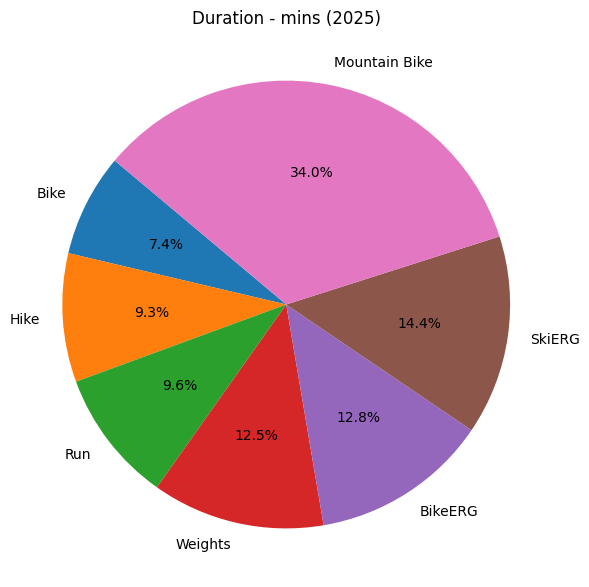


--- Charts for All Time ---


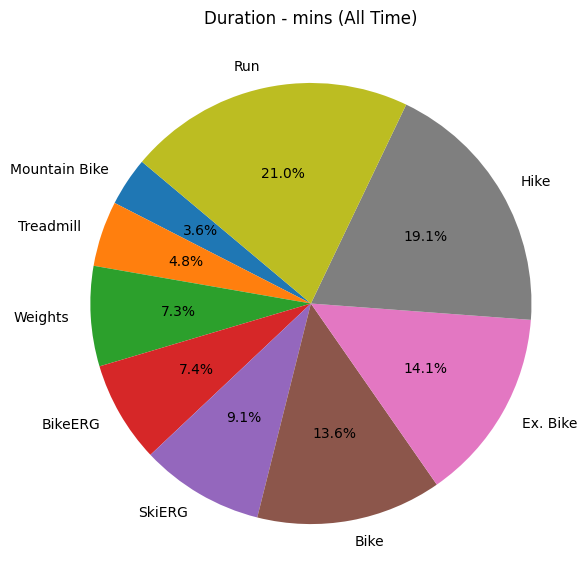


Current timestamp: 2025-11-07 19:16:39.847806


In [ ]:
# @title
plot_flexible_pie_charts_by_time(df, ['Duration - mins'], ['current_year', 'all_time'])

from datetime import datetime

# Get current timestamp
current_time = datetime.now()

# Print it
print()
print("Current timestamp:", current_time)


### Distance by Exercise Type Over Time

These stacked bar charts show the total distance covered for each exercise type over different time periods.


--- Charts for All Time ---


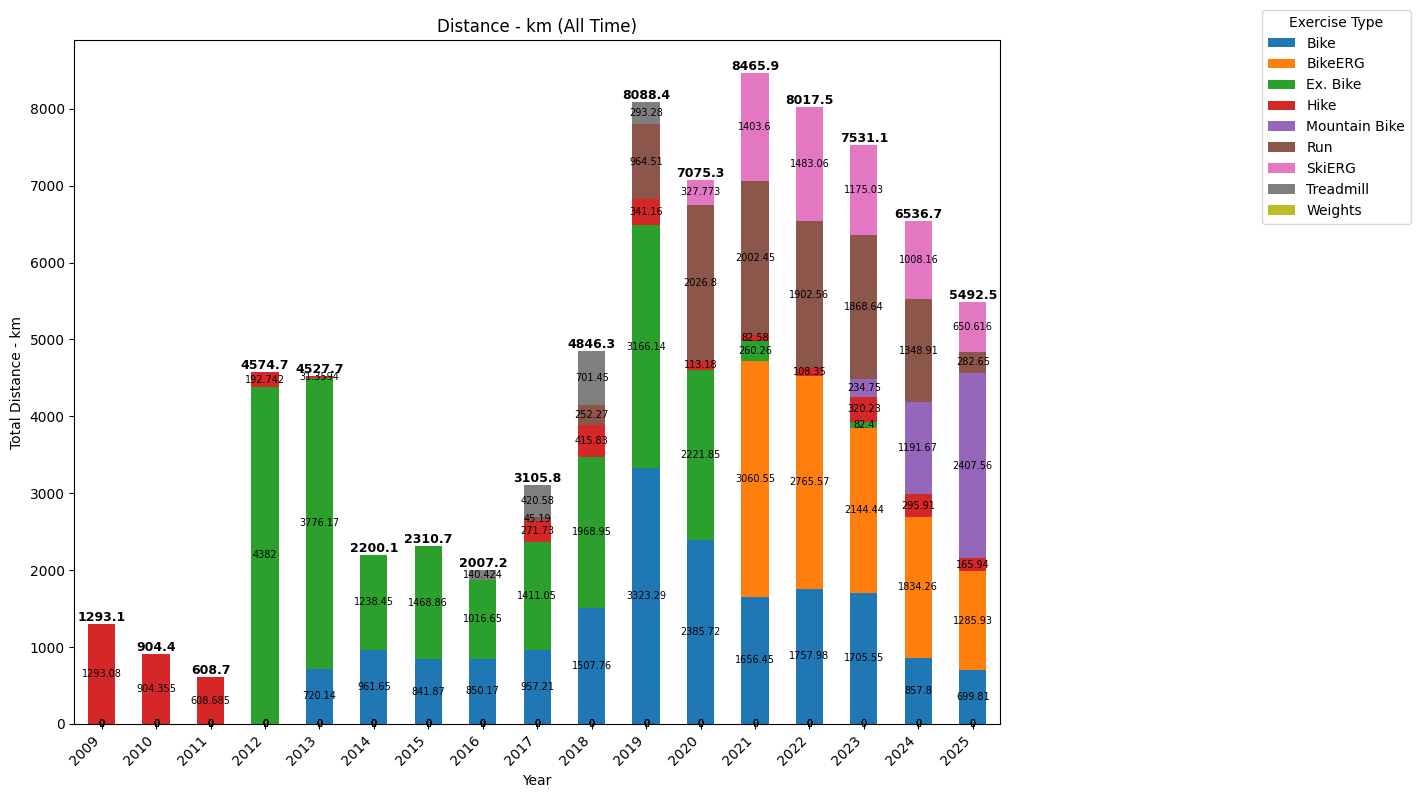


--- Charts for Rolling 13 Months ---


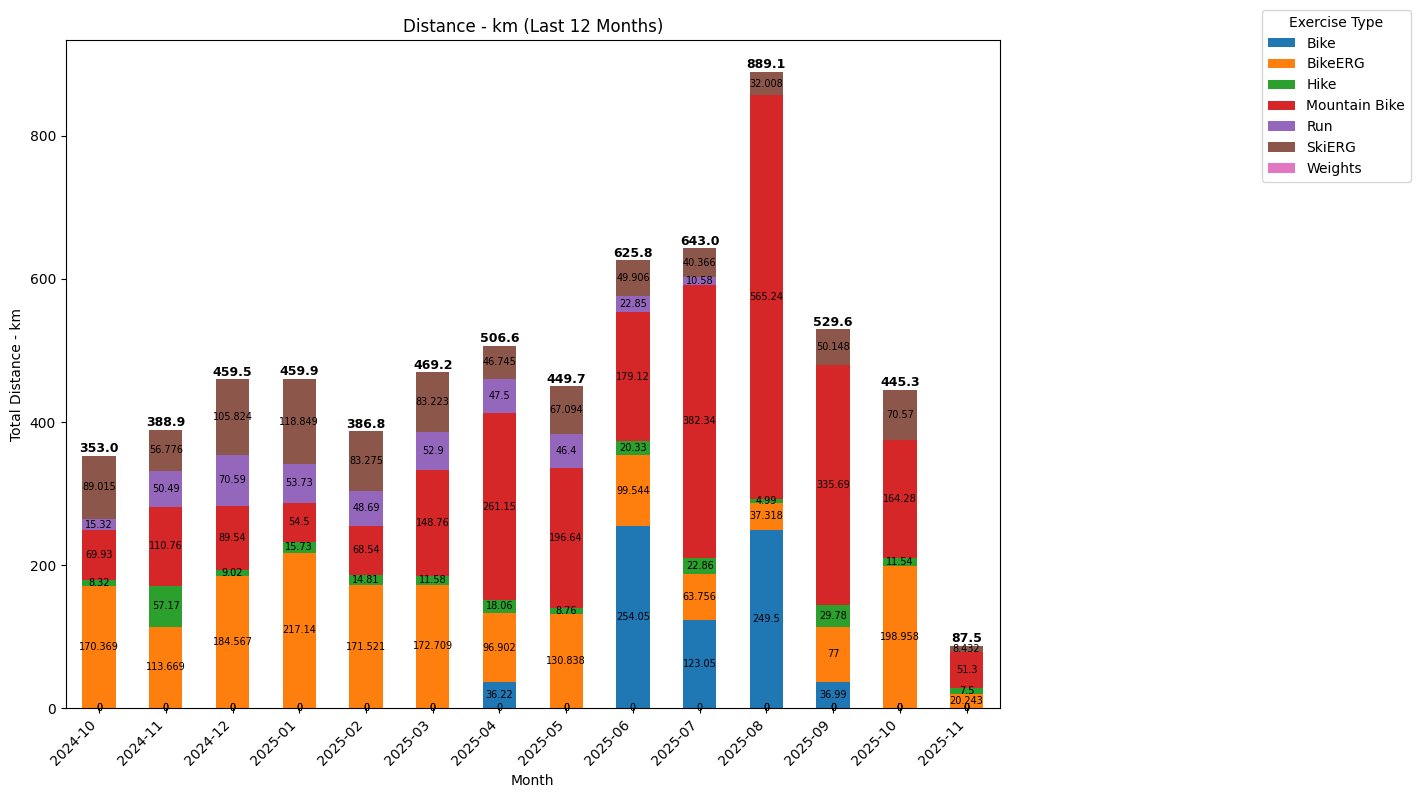


--- Charts for Current Month ---


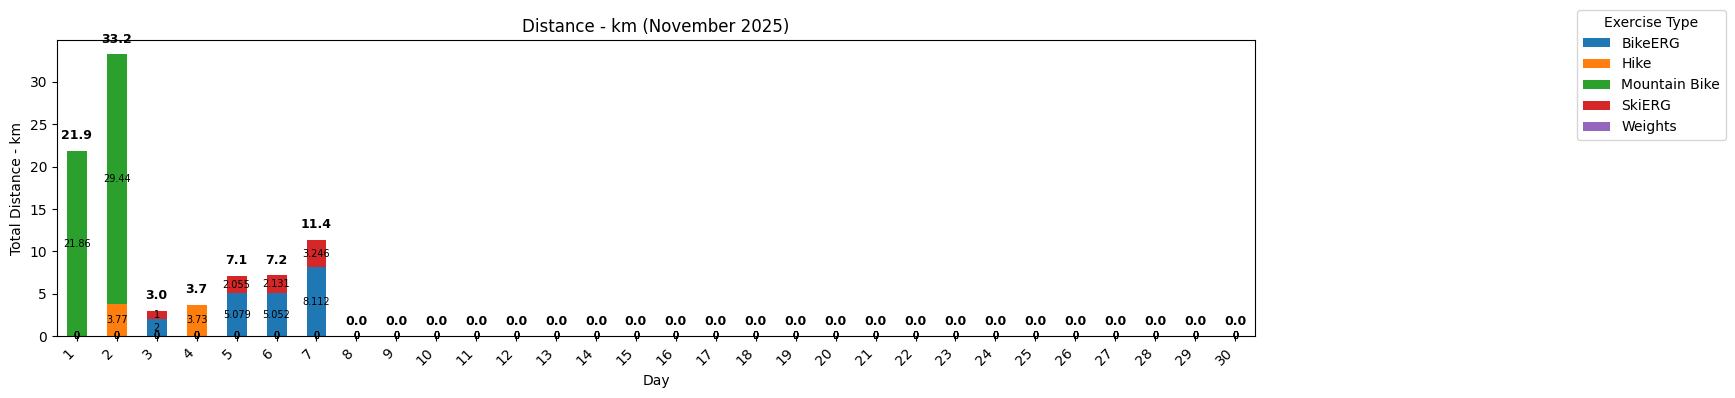


Current timestamp: 2025-11-07 19:16:42.976436


In [ ]:
# @title
plot_flexible_stacked_bar_charts(df, ['Distance - km'], ['all_time'])
plot_flexible_stacked_bar_charts(df, ['Distance - km'], ['rolling_13_months'])
plot_flexible_stacked_bar_charts(df, ['Distance - km'], ['current_month'])

from datetime import datetime

# Get current timestamp
current_time = datetime.now()

# Print it
print()
print("Current timestamp:", current_time)


### Duration by Exercise Type Over Time

These stacked bar charts illustrate the total duration of each exercise type across various timeframes.


--- Charts for All Time ---


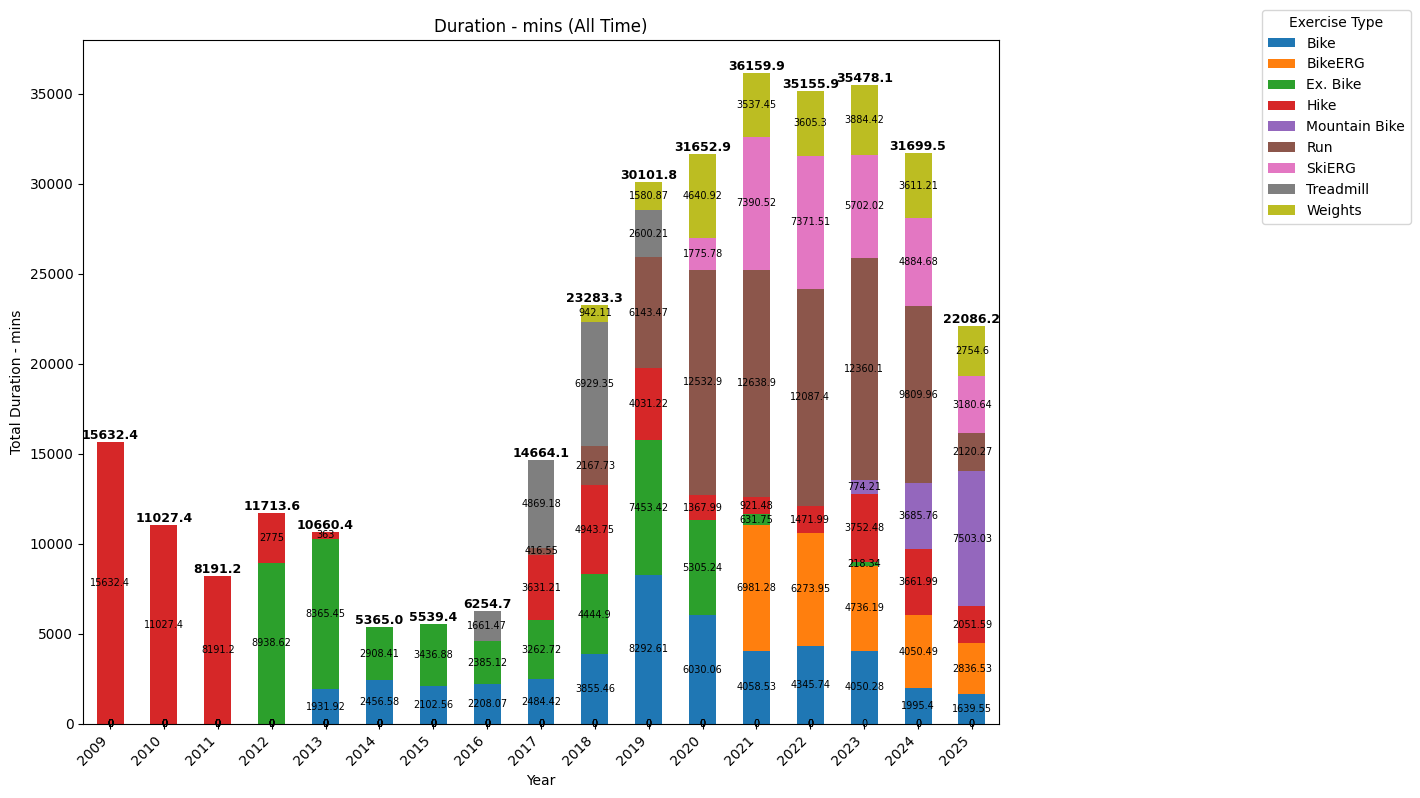


--- Charts for Rolling 13 Months ---


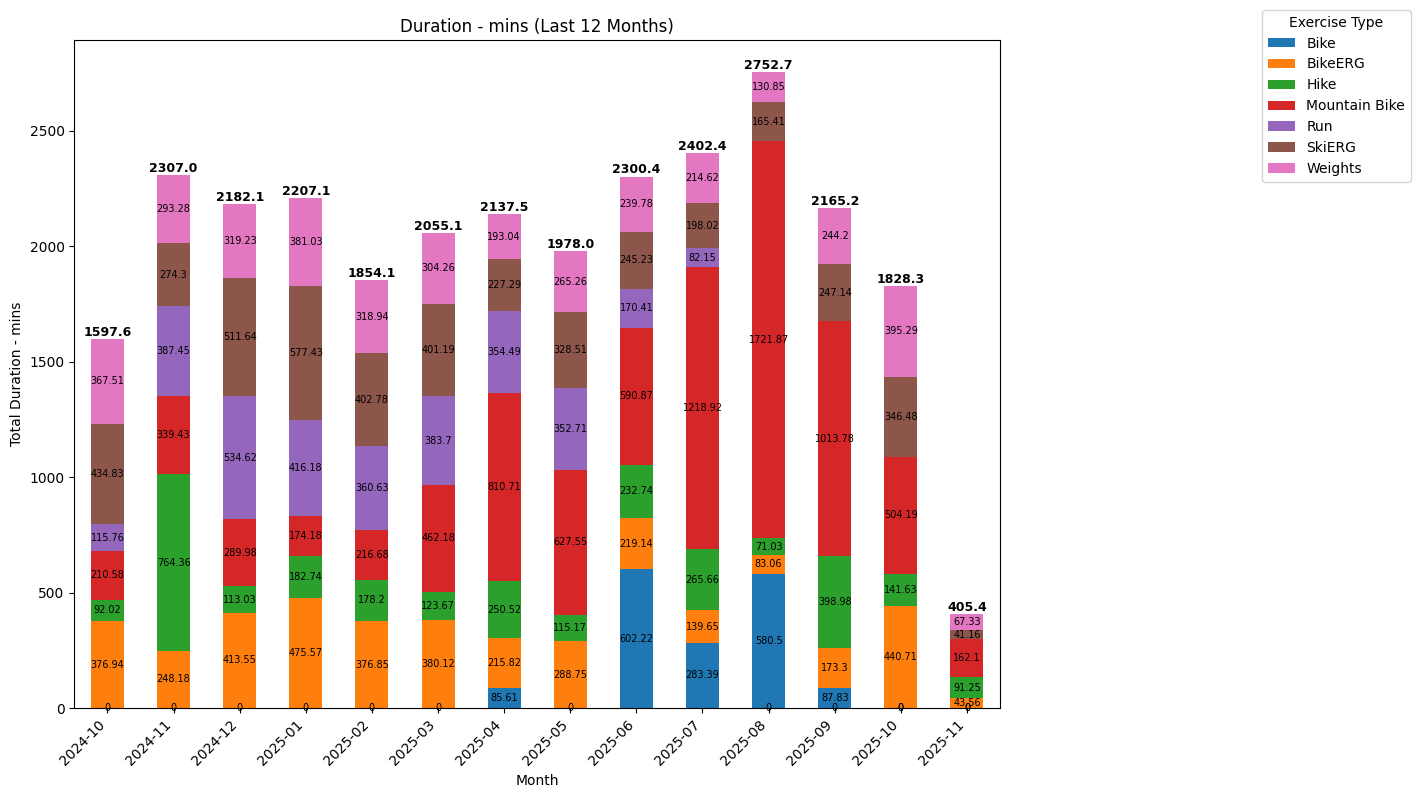


--- Charts for Current Month ---


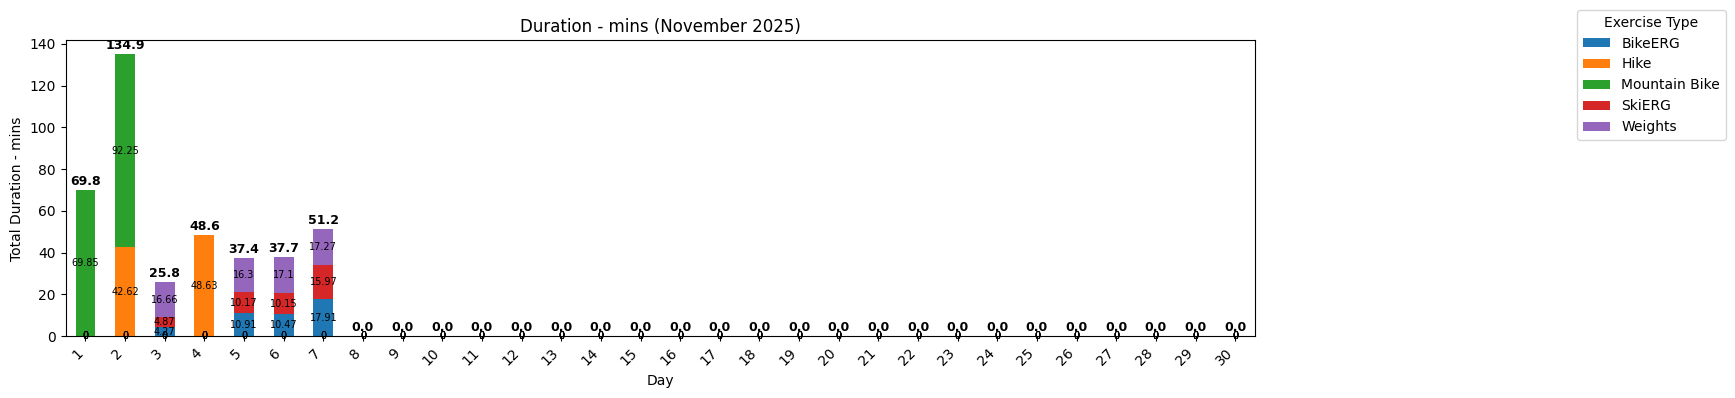


Current timestamp: 2025-11-07 19:16:46.568985


In [ ]:
# @title
plot_flexible_stacked_bar_charts(df, ['Duration - mins'], ['all_time'])
plot_flexible_stacked_bar_charts(df, ['Duration - mins'], ['rolling_13_months'])
plot_flexible_stacked_bar_charts(df, ['Duration - mins'], ['current_month'])

from datetime import datetime

# Get current timestamp
current_time = datetime.now()

# Print it
print()
print("Current timestamp:", current_time)


### Calories Burned by Exercise Type Over Time

These stacked bar charts show the total calories burned for each exercise type across different time periods.


--- Charts for All Time ---


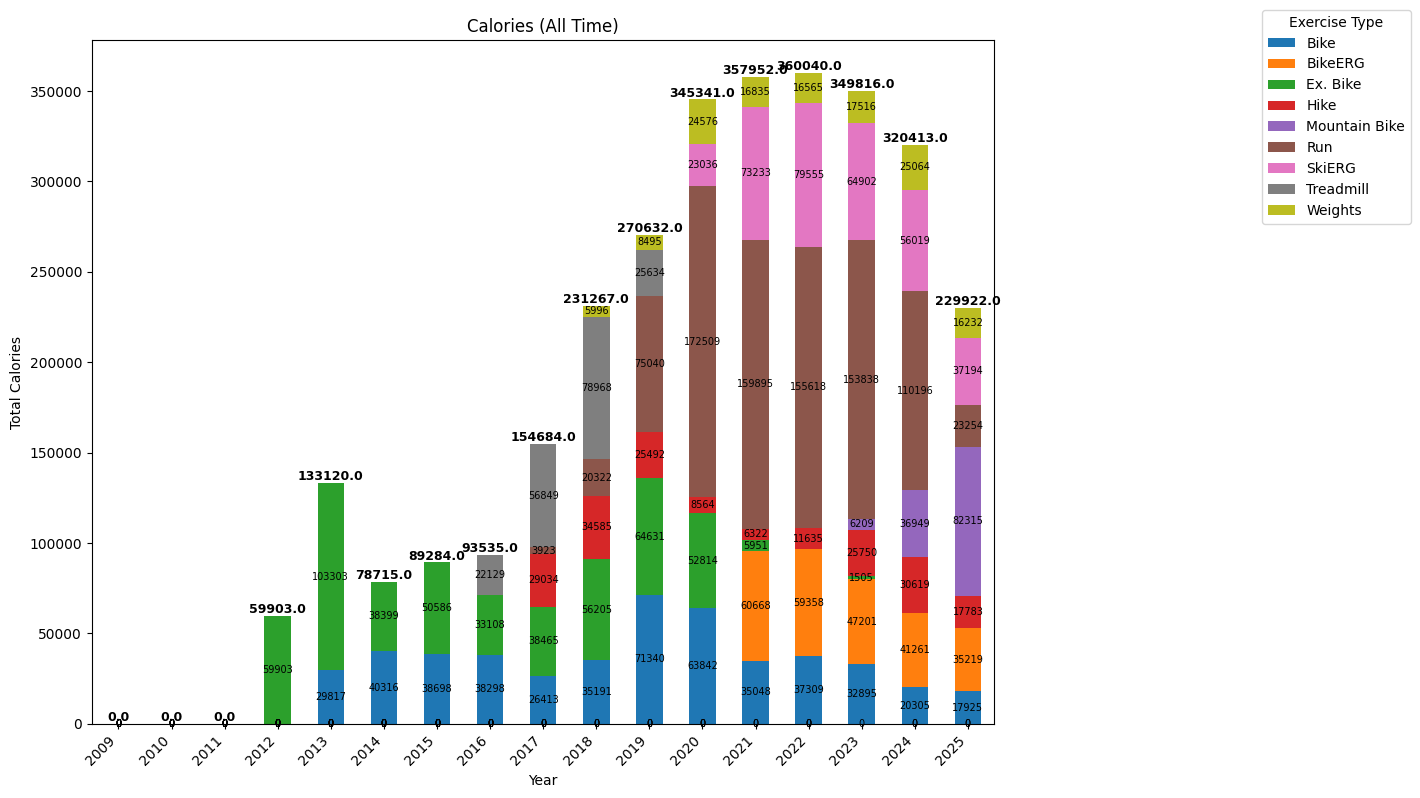


--- Charts for Rolling 13 Months ---


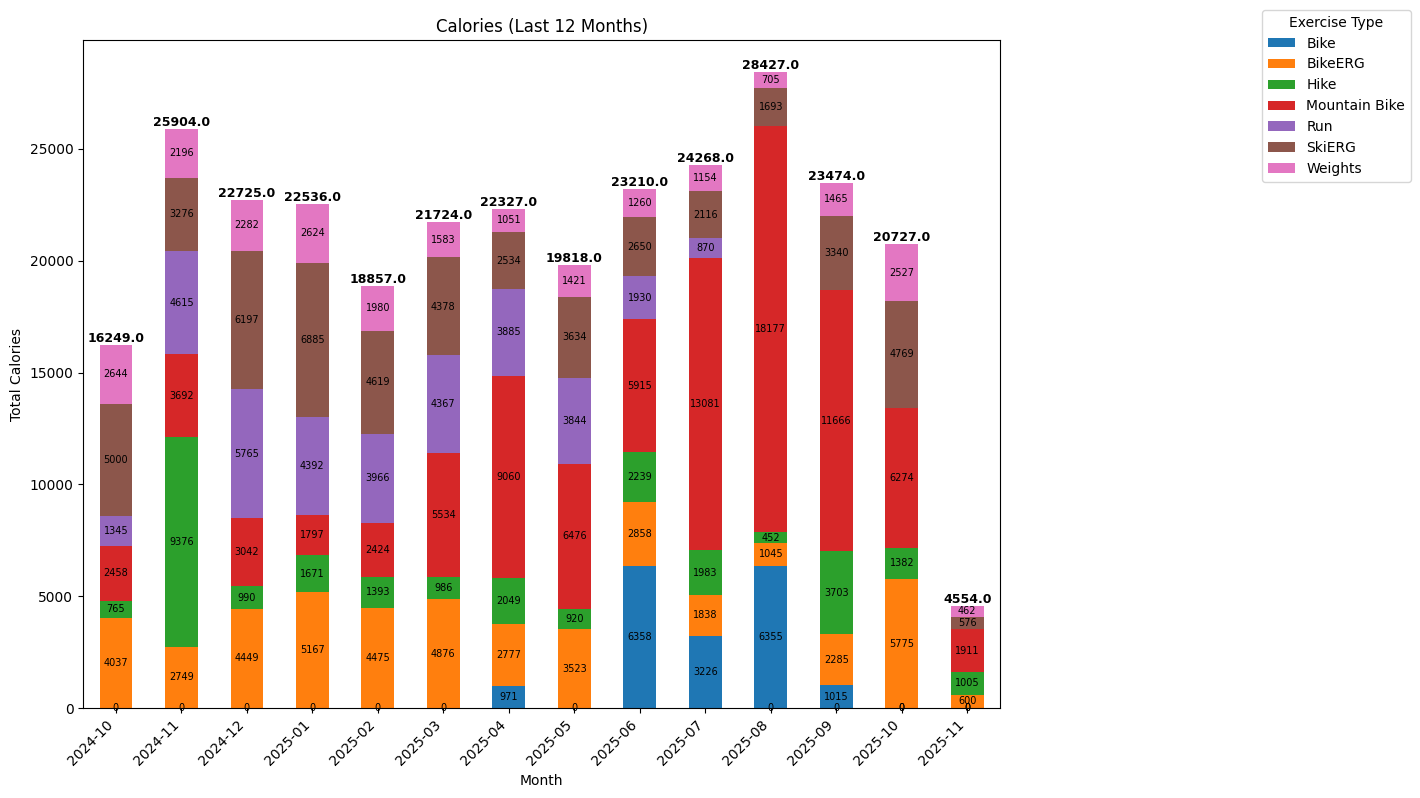


--- Charts for Current Month ---


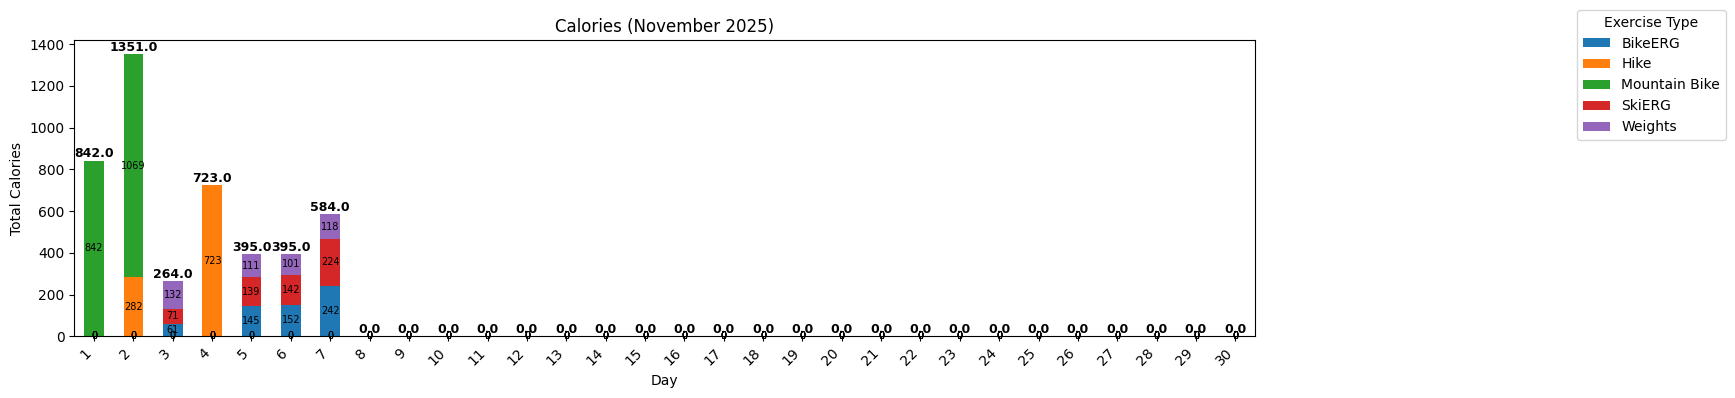


Current timestamp: 2025-11-07 19:16:49.806674


In [ ]:
# @title
plot_flexible_stacked_bar_charts(df, ['Calories'], ['all_time'])
plot_flexible_stacked_bar_charts(df, ['Calories'], ['rolling_13_months'])
plot_flexible_stacked_bar_charts(df, ['Calories'], ['current_month'])

from datetime import datetime

# Get current timestamp
current_time = datetime.now()

# Print it
print()
print("Current timestamp:", current_time)


### Last 7 Days Summary

This section provides a summary of your activity during the last 7 days, including aggregated data and pie/stacked bar charts.

,Metric,Last 7 Days
0,Total Distance (km),87.47
1,Total Time (hours),6.76
2,Total Calories (kcal),4554.00



--- Charts for Last 7 Days ---


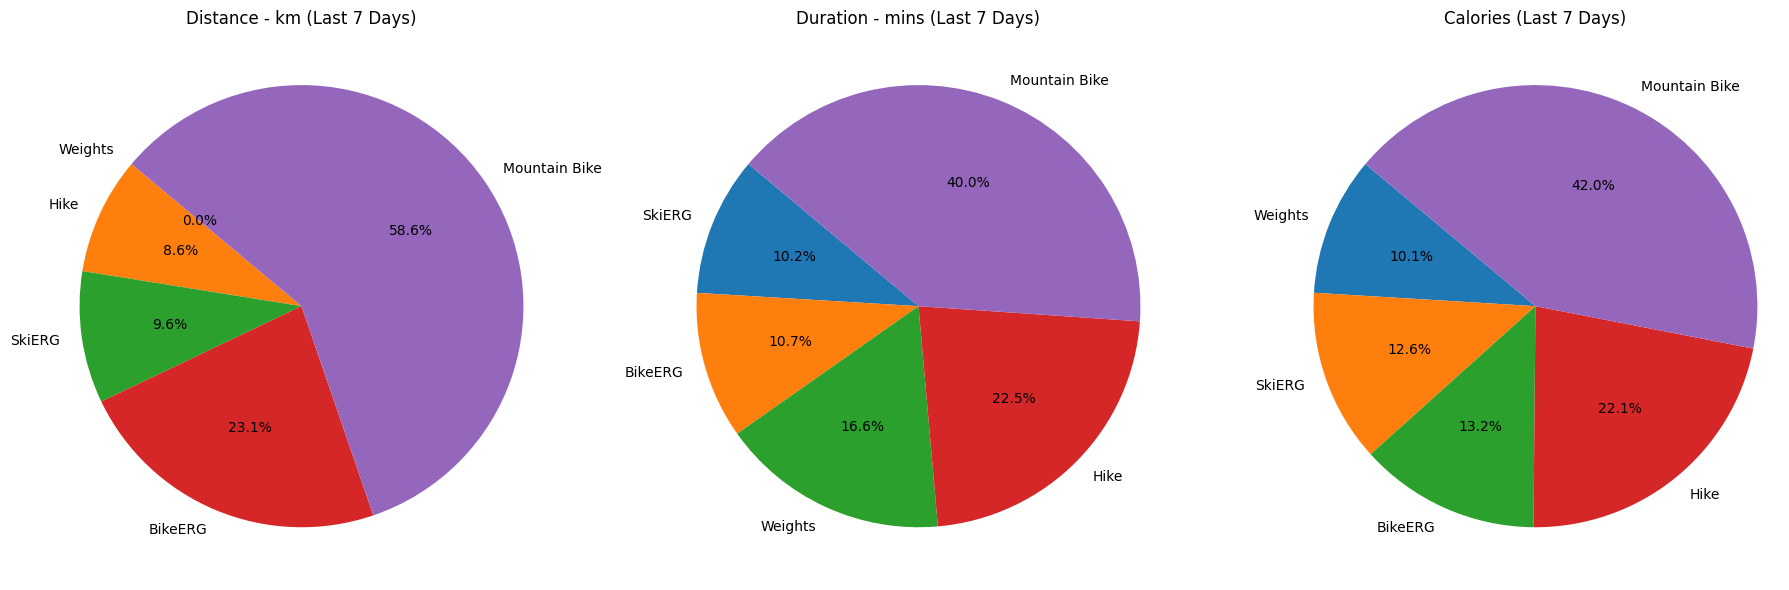


--- Charts for Last 7 Days ---


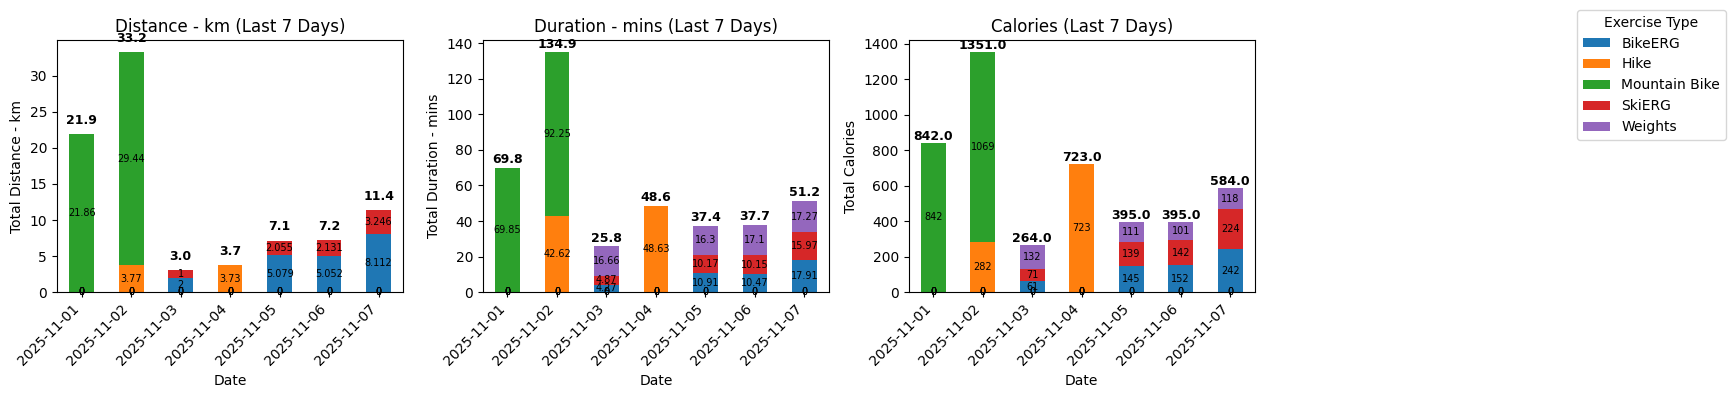


Current timestamp: 2025-11-07 19:16:51.325299


In [ ]:
# @title
aggregate_data(df, ['last_7_days'])
plot_flexible_pie_charts_by_time(df, ['Distance - km', 'Duration - mins', 'Calories'], ['last_7_days'])
plot_flexible_stacked_bar_charts(df, ['Distance - km', 'Duration - mins', 'Calories'], ['last_7_days'])

from datetime import datetime

# Get current timestamp
current_time = datetime.now()

# Print it
print()
print("Current timestamp:", current_time)


### Total Duration by Exercise Type Stacked by Year

This stacked bar chart visualizes the total exercise duration for each exercise type, broken down by year.

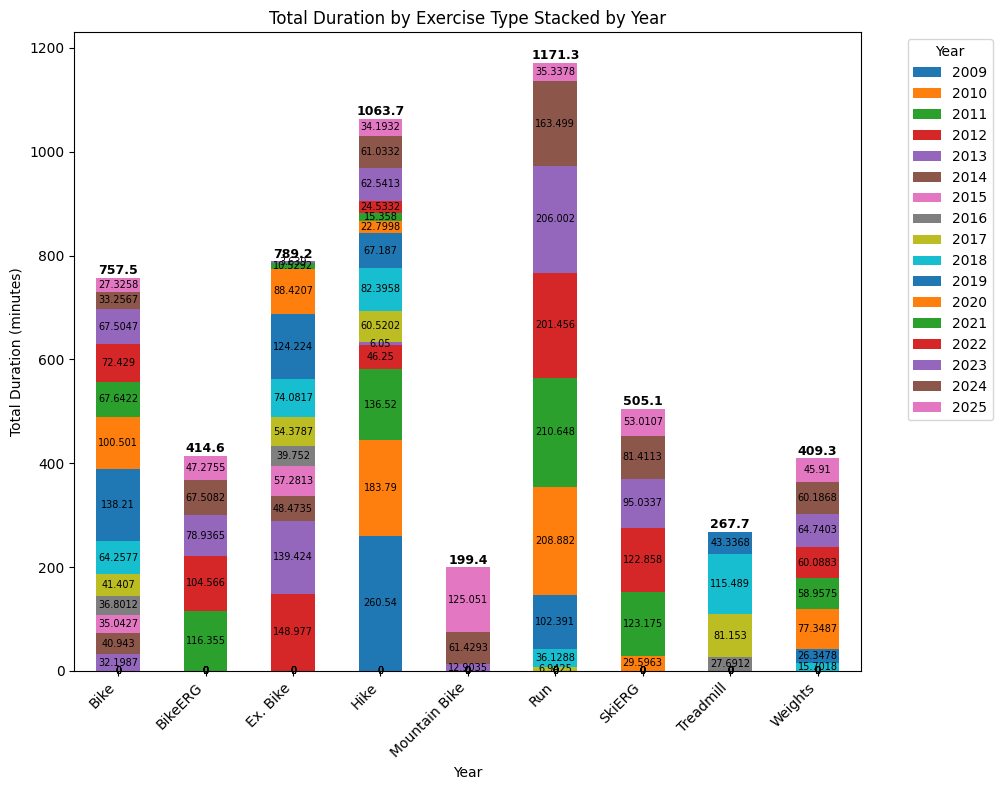


Current timestamp: 2025-11-07 19:16:52.411811


In [ ]:
# @title
plot_duration_by_exercise_type_stacked_by_year(df)

from datetime import datetime

# Get current timestamp
current_time = datetime.now()

# Print it
print()
print("Current timestamp:", current_time)


### Exercise Metrics Over Time

These plots show various exercise metrics (kph, Calories per km, Calories per hour, Duration) over time for different exercise types and time periods. Use the dropdown to select an exercise type.

In [ ]:
# @title
plot_exercise_metrics_over_time(df, 'all_time', ['kph', 'Calories per km', 'Calories per hour'])
plot_exercise_metrics_over_time(df, 'rolling_5_years', ['kph'])
plot_exercise_metrics_over_time(df, 'rolling_5_years', ['Calories per km'])
plot_exercise_metrics_over_time(df, 'rolling_5_years', ['Calories per hour'])
plot_exercise_metrics_over_time(df, 'rolling_2_years', ['Duration - hours'])
plot_exercise_metrics_over_time(df, 'all_time', ['Duration - hours'])

from datetime import datetime

# Get current timestamp
current_time = datetime.now()

# Print it
print()
print("Current timestamp:", current_time)


interactive(children=(Dropdown(description='Exercise Type:', options=('ALL', 'Hike', 'Ex. Bike', 'Bike', 'Trea…

interactive(children=(Dropdown(description='Exercise Type:', options=('ALL', 'Hike', 'Ex. Bike', 'Bike', 'Trea…

interactive(children=(Dropdown(description='Exercise Type:', options=('ALL', 'Hike', 'Ex. Bike', 'Bike', 'Trea…

interactive(children=(Dropdown(description='Exercise Type:', options=('ALL', 'Hike', 'Ex. Bike', 'Bike', 'Trea…

interactive(children=(Dropdown(description='Exercise Type:', options=('ALL', 'Hike', 'Ex. Bike', 'Bike', 'Trea…

interactive(children=(Dropdown(description='Exercise Type:', options=('ALL', 'Hike', 'Ex. Bike', 'Bike', 'Trea…


Current timestamp: 2025-11-07 19:17:03.252303


### Interactive Exercise Table

Use this interactive table to filter, sort, and view your exercise entries.

In [ ]:
# @title
create_interactive_table(df)

from datetime import datetime

# Get current timestamp
current_time = datetime.now()

# Print it
print()
print("Current timestamp:", current_time)



Current timestamp: 2025-11-07 19:17:03.729109
